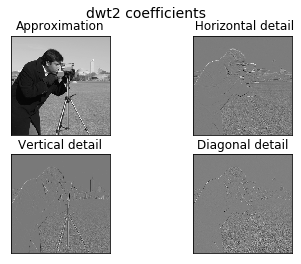

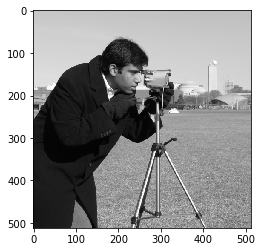

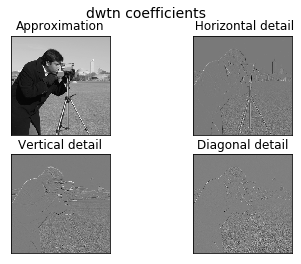

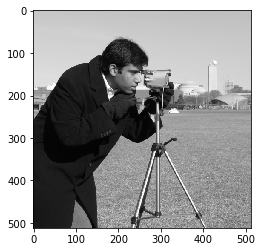

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


# Load image
original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure()
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=12)
    ax.set_xticks([])
    ax.set_yticks([])

fig.suptitle("dwt2 coefficients", fontsize=14)

# Now reconstruct and plot the original image
reconstructed = pywt.idwt2(coeffs2, 'bior1.3')
fig = plt.figure()
plt.imshow(reconstructed, interpolation="nearest", cmap=plt.cm.gray)

# Check that reconstructed image is close to the original
np.testing.assert_allclose(original, reconstructed, atol=1e-13, rtol=1e-13)


# Now do the same with dwtn/idwtn, to show the difference in their signatures

coeffsn = pywt.dwtn(original, 'bior1.3')
fig = plt.figure()
for i, key in enumerate(['aa', 'ad', 'da', 'dd']):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.imshow(coeffsn[key], interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=12)
    ax.set_xticks([])
    ax.set_yticks([])

fig.suptitle("dwtn coefficients", fontsize=14)

# Now reconstruct and plot the original image
reconstructed = pywt.idwtn(coeffsn, 'bior1.3')
fig = plt.figure()
plt.imshow(reconstructed, interpolation="nearest", cmap=plt.cm.gray)

# Check that reconstructed image is close to the original
np.testing.assert_allclose(original, reconstructed, atol=1e-13, rtol=1e-13)


plt.show()
